# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.144216e+01     9.263386e+00
 * time: 0.0016031265258789062
     1     2.852612e+01     4.801148e+00
 * time: 0.006540060043334961
     2     1.921201e+01     4.449579e+00
 * time: 0.012049198150634766
     3     1.325847e+01     3.068870e+00
 * time: 0.015974044799804688
     4     1.212212e+01     3.813606e+00
 * time: 0.01902604103088379
     5     1.023980e+01     1.796320e+00
 * time: 0.02290511131286621
     6     9.401121e+00     2.403887e+00
 * time: 0.026420116424560547
     7     8.678289e+00     1.446951e+00
 * time: 0.029958009719848633
     8     8.245553e+00     9.224705e-01
 * time: 0.03435111045837402
     9     8.106233e+00     8.415454e-01
 * time: 0.038331031799316406
    10     8.028627e+00     6.886291e-01
 * time: 0.042118072509765625
    11     8.003840e+00     9.152483e-01
 * time: 0.045687198638916016
    12     7.979604e+00     7.310512e-01
 * time: 0.04940009117126465
    13     7.951687e+00     5.532630e-0

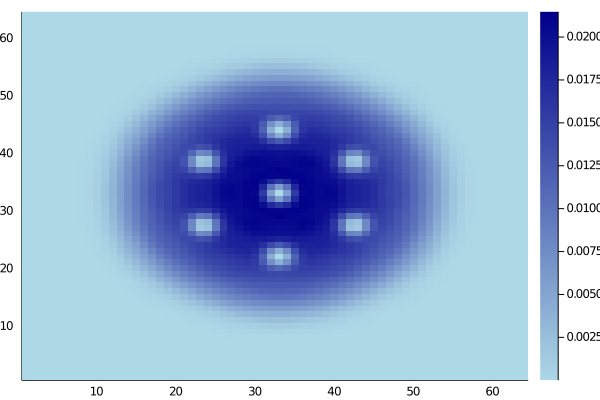

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)